

# Project: Investigate a Dataset - [No-show appointments data set]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
### Dataset Description 

 

### Question(s) for Analysis


In [402]:
# import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Some of questions to analysis data :

-There is Age effect to Attend  medical appointments patients?

-Is Neighbourhood effect to Attend medical appointments patient ?

-Is patients have Diabetes effect to Attend their medical appointments ?

-Is patients have Hypertension effect to Attend their medical appointments ?

-What is effect Gender to Attend their medical appointments patients ?

-There is SMS_received effect to Attend  medical appointments patients?

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties


In [403]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [404]:
#the ship of the data
df.shape

(110527, 14)

In [405]:
#for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [406]:
#explain sum of No-show , SMS_received,Diabetes ,Hipertension and Scholarship
mydata=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [407]:
#sum of patients
df['PatientId'].duplicated().sum()

48228

In [408]:
#sum of patients that no-show
df.duplicated(['PatientId','No-show']).sum()

38710

### Data Cleaning

In [409]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [410]:
#describe the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [411]:
#count of patients according to thier Age
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, dtype: int64

>There is Age effect to Attend medical appointments patients?

In [412]:
# count of Age according to No_show
count_of_Age = df.groupby("Age")["No-show"].value_counts()
print(count_of_Age)

Age   No-show
-1    No            1
 0    No         2900
      Yes         639
 1    No         1858
      Yes         415
 2    No         1366
      Yes         252
 3    No         1236
      Yes         277
 4    No         1017
      Yes         282
 5    No         1169
      Yes         320
 6    No         1205
      Yes         316
 7    No         1126
      Yes         301
 8    No         1106
      Yes         318
 9    No         1008
      Yes         364
 10   No          970
      Yes         304
 11   No          948
      Yes         247
 12   No          820
      Yes         272
 13   No          800
      Yes         303
 14   No          802
                 ... 
 86   Yes          42
 87   No          157
      Yes          27
 88   No          114
      Yes          12
 89   No          144
      Yes          29
 90   No           86
      Yes          23
 91   No           53
      Yes          13
 92   No           66
      Yes          20
 93   No          

>** my conclusion : Age effect to Attend medical appointments patients as kids the most attend patients

In [413]:
#to clean -1 in age
mydata.dropna(thresh=-1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [414]:
#correcting "Hipertension"
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>-Is patients have Hypertension effect to Attend their medical appointments ?

In [415]:
#count of Hypertension according to No_show
count_of_Hypertension = df.groupby("Hypertension")["No-show"].value_counts()
print(count_of_Hypertension)

Hypertension  No-show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: No-show, dtype: int64


>**" my conclusion that Hypertension did not effect to to Attend medical appointments patient "

In [416]:
#count of patients according to Handcap
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [417]:
#removing the unnesesary data
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [418]:
#correcting "Hipertension"
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [419]:
#count of patients accourding to 'Neighbourhood'
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

<a id='eda'></a>
## Exploratory Data Analysis

>  Exploratory Data Analysis
Now i trimmed and cleaned the data, i ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. 


### General look

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x3587D710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x35994690>]], dtype=object)

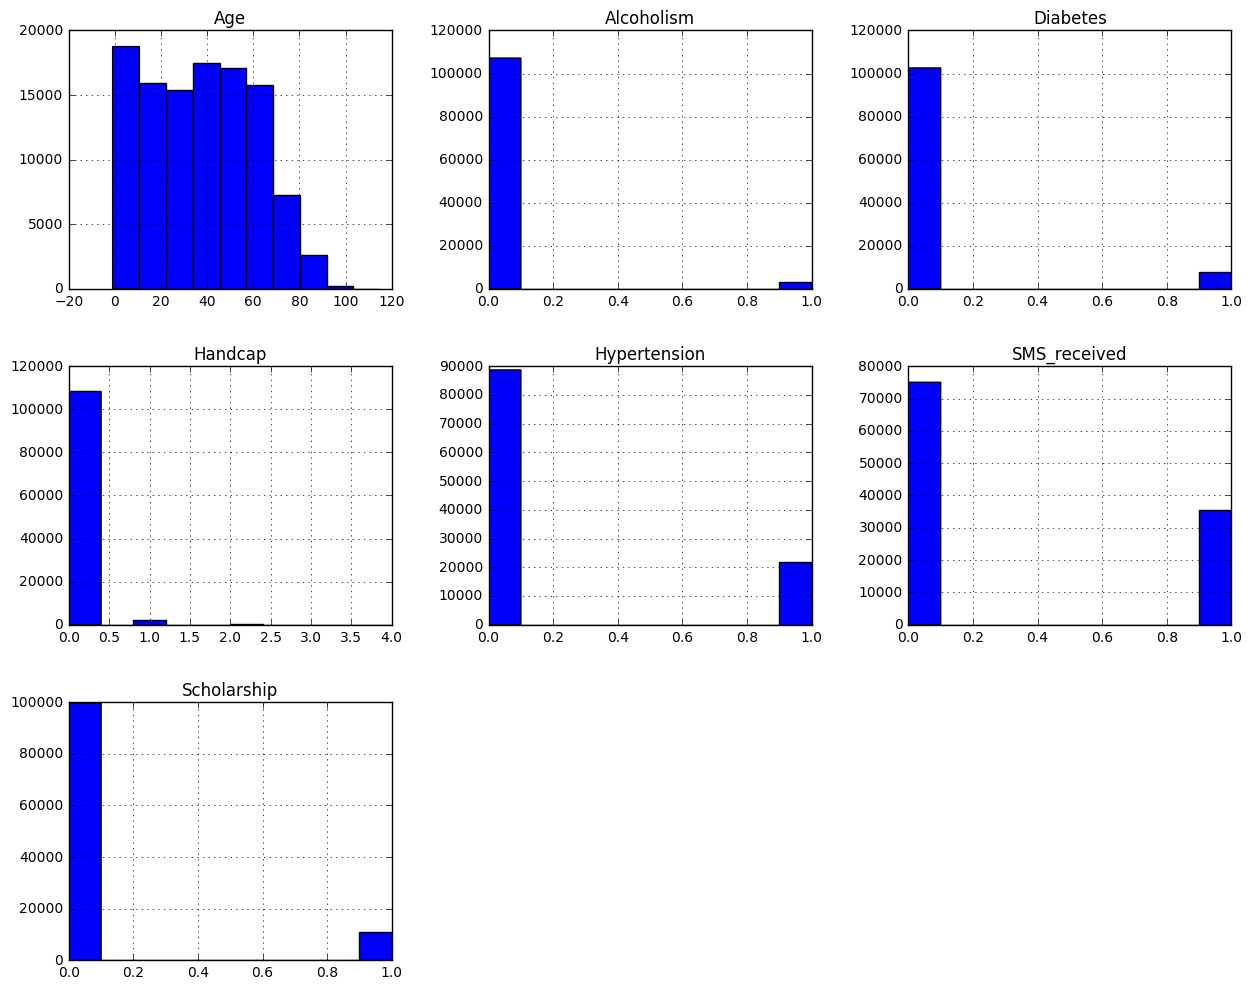

In [420]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,12))

### Research Question 2  (Replace this header name!)

In [421]:
#the count of patients according to Attend
df.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

>-Is patients have Diabetes effect to Attend their medical appointments ?

In [422]:
#what is number of patients have Diabetes and Attend ?
count_of_Diabetes = df.groupby("Diabetes")["No_show"].value_counts()
print(count_of_Diabetes)

Diabetes  No_show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: No_show, dtype: int64


>**" my conclusion that Diabetes does not effect to to Attend medical appointments patient "

>-There is Neighbourhood effect to Attend medical appointments patient ?

In [424]:
#count of Neighbourhood according to No_show
count_of_Neighbourhood = df.groupby("Neighbourhood")["No_show"].value_counts()
print(count_of_Neighbourhood)

Neighbourhood        No_show
AEROPORTO            No            7
                     Yes           1
ANDORINHAS           No         1741
                     Yes         521
ANTÔNIO HONÓRIO      No          221
                     Yes          50
ARIOVALDO FAVALESSA  No          220
                     Yes          62
BARRO VERMELHO       No          332
                     Yes          91
BELA VISTA           No         1523
                     Yes         384
BENTO FERREIRA       No          665
                     Yes         193
BOA VISTA            No          254
                     Yes          58
BONFIM               No         2223
                     Yes         550
CARATOÍRA            No         1974
                     Yes         591
CENTRO               No         2631
                     Yes         703
COMDUSA              No          254
                     Yes          56
CONQUISTA            No          689
                     Yes         160
CONSOLAÇÃ

>**" my conclusion that Neighbourhood does not effect to to Attend medical appointments patient "

In [425]:
#the count of patients according to Gender
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

>-What is effect Gender to Attend their medical appointments patients ?

In [426]:
#the count of patients according to Gender
count_of_Gender = df.groupby("Gender")["No_show"].value_counts()
print(count_of_Gender)

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64


>**" my conclusion visualization whenever increase count of Gender increase the potential to Attend "

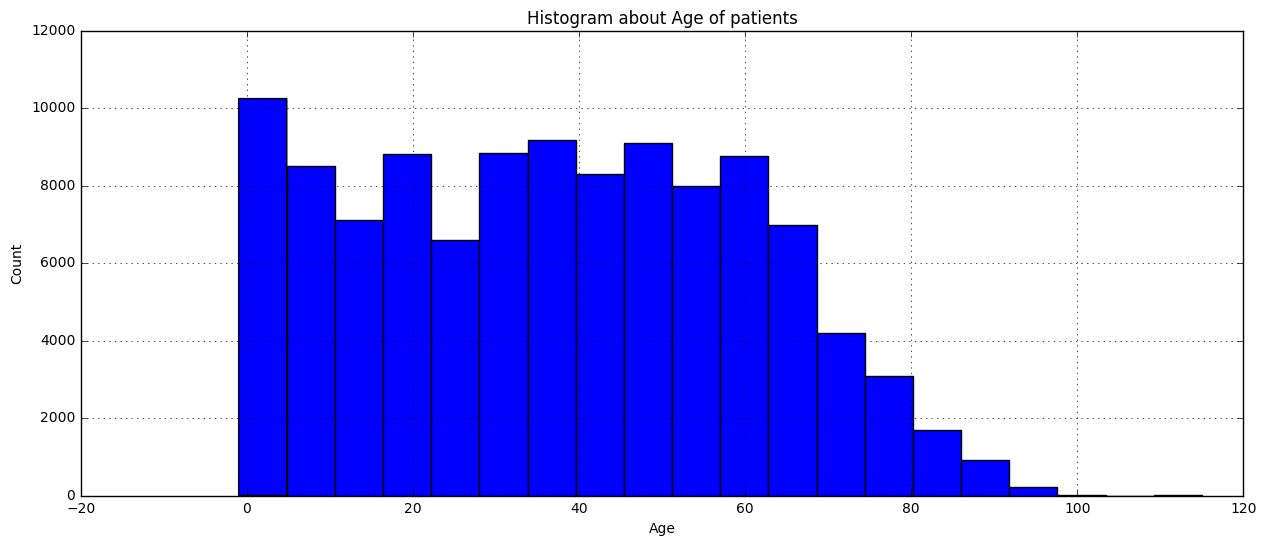

In [427]:
# Histogram plot of show data accourding to Age of patients
df.Age.hist(bins=20,figsize=(15,6)) 
plt.xlabel("Age") 
plt.ylabel("Count") 
plt.title("Histogram about Age of patients");

>-There is SMS_received effect to Attend medical appointments patients?

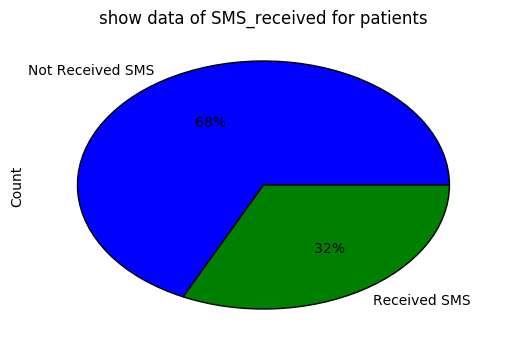

In [428]:
#show the data of SMS_received to patients
df["SMS_received"].value_counts().plot(kind="pie",labels=["Not Received SMS","Received SMS"],   autopct='%5.0f%%')
plt.ylabel("Count")
plt.title("show data of SMS_received for patients");

In [429]:
#the count of patients who received SMS_received according to No_show
count_of_SMS_received = df.groupby("SMS_received")["No_show"].value_counts()
print(count_of_SMS_received)

SMS_received  No_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No_show, dtype: int64


>**"my conclusion that SMS_received did not effect to to Attend medical appointments patient 
because the largest count of patients who did not receive sms attend the medical appointment more than patients who recived sms and did not attend "

<a id='conclusions'></a>
## Conclusions


> - Hypertension did not effect to to Attend medical appointments patient because patients who have Hypertension and attend more than patients who did not have Hypertension and did not attend
> - that Diabetes did not effect to to Attend medical appointments patient like Hypertension patients have Diabetes and attend the medical appointment
> - visualization whenever increase count of Gender increase the potential to Attend so females are the largest count of attend 
> - my conclusion that SMS_received does not effect to to Attend medical appointments patient because the largest count of patients who did not receive sms attend the medical appointment more than patients who recived sms and did not attend
> - Age effect to Attend medical appointments patients who baby younger than one year the most attend patients because they be sick queckly and after 70 years were decrease
> - the Neighbourhood did not effect to attend patients as who want to attend he did regardless of their city

>Histogram:

>  that show the count of patients who received SMS_received or not

>  Histogram plot of show data accourding to Age of patients


In [430]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

-1